# Lab Assignment One: Exploring Table Data

### Luis Garduno
## 1. Business Understanding

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; About League of Legends :
Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer
video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue
& 'Red') facing each other, where the main objective is to destroy the opposing
teams 'Nexus', or home base, while facing obstacles like destroying damage dealing
towers & eliminating players throughout the way. Perks & gold are able to be
obtained by players/teams through completing tasks such as eliminating players,
enemy creeps, or dragons. Players then spend the gold to purchase items that help
raise the power of their abilities.

League of Legends offers different game modes, such as ranked. In this game mode,
players are given a rank based off of the number of wins + the number of games
played. "Diamond" is one of the highest ranks a player may obtain and is known
to be extremely competitive. A ranked game on average lasts 30-45 minutes. The
dataset we will be using contains the first 10 minute analytics of each team
for different diamond ranked matches.

Once the data is analyzed, teams/players would be able to conceptualize the level
of priority different attributes have during early stages of diamond ranked
matches. They could then use this information to adjust their strategy to one
proven to win matches.

Additionally, players who are accustomed to playing as the 'jungle' role (a player
role that focuses on obtaining objective eliminations within the jungle areas of
the map) can use this analyzed data to better understand the impact elite monsters
have on winning games.

-------------------------------------

Dataset : https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Question Of Interest : As of the first 10 minutes, which team will win?

## 2. Data Understanding

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.1 Data Description

In [25]:
import numpy as np
import pandas as pd

# Load in the dataset into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/Datasets/high_diamond_ranked_10min.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

---------------------------------

Printing out the information about the dataframe we are able to see that there are a
total of 9,879 instances, and 39 attributes.

Additionally we are able to see that there are 19 of the same attributes for each
the blue & red team (columns 1-19 are the same as 20-38).

Attributes for each team includes :
- Wards placed & destroyed
- Total number of kills, deaths, & assists
- First Bloods (1st elimination of the game)
- Total : towers destroyed, gold, experience
- Average : level, CS per minute, & gold per minute
- Difference in gold & experience between the teams
- Objective eliminations : elite monsters(dragons, heralds), minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc.
will be of type integer (int64) because they will always be whole numbers. Attributes involving
averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point
format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to
visualize these attributes, optimally it is best to keep these as integer data types. As a result,
the data types presented for each attribute are correct and should not be changed.

Below is a brief description of some of the key attributes.

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# describe dataframe
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [27]:
df_data_description = pd.DataFrame({'Features' : ['blueWins','WardsPlaced / WardsDestroyed','FirstBlood','Kills / Deaths / Assists','TowersDestroyed',
                                                  'TotalGold','AvgLevel','TotalExperience','CSPerMin','GoldPerMin']})

df_data_description['Description'] = ['whether blue team won or not','number of total wards placed or destroyed by team','team with the first kill of game',
                                      'total number of kills, deaths, or assists of team','total number of towers destroyed by team','total gold obtained by team',
                                      'average level of all players on team','total experience points accumulated by team','average creep score per minute',
                                      'average gold obtained per minute']

df_data_description['Feature type'] = ['Discrete','Continuous','Discrete','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous']

df_data_description['Attribute Type'] = ['nominal','ratio','nominal','ratio','ratio','ratio','ratio','ratio','ratio','ratio']

df_data_description['Range'] = ['0: red team won; 1: blue team won','placed: 5 - 250;destroyed: 0 - 27','0: did not get first kill; 1: team obtained first kill',
                                'kills: 0-22;deaths: 0-22;assists: 0-29','0 - 2','11,000 - 25,000','4.5 - 8.5','10,000 - 24,000','10.0 - 30.0','1,100.0 - 2,000.0']
df_data_description

,Features,Description,Feature type,Attribute Type,Range
0,blueWins,whether blue team won or not,Discrete,nominal,0: red team won; 1: blue team won
1,WardsPlaced / WardsDestroyed,number of total wards placed or destroyed by team,Continuous,ratio,placed: 5 - 250;destroyed: 0 - 27
2,FirstBlood,team with the first kill of game,Discrete,nominal,0: did not get first kill; 1: team obtained fi...
3,Kills / Deaths / Assists,"total number of kills, deaths, or assists of team",Continuous,ratio,kills: 0-22;deaths: 0-22;assists: 0-29
4,TowersDestroyed,total number of towers destroyed by team,Continuous,ratio,0 - 2
5,TotalGold,total gold obtained by team,Continuous,ratio,"11,000 - 25,000"
6,AvgLevel,average level of all players on team,Continuous,ratio,4.5 - 8.5
7,TotalExperience,total experience points accumulated by team,Continuous,ratio,"10,000 - 24,000"
8,CSPerMin,average creep score per minute,Continuous,ratio,10.0 - 30.0
9,GoldPerMin,average gold obtained per minute,Continuous,ratio,"1,100.0 - 2,000.0"


### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.2 Data Quality

Using the `missingno` package, we are able to additionally confirm that all the data is complete
and there is no missing entries with the dataset. If there was missing data, we could impute the
missing values by using the k-nearest neighbor. But if an instance was missing a majority of its
attributes, it would be removed from the dataset.

The number of unique values in the column "gameId" is printed to verify that all instances
are weighted equally.

Number of unique values in column "gameId" :  9879
Duplicates :  0


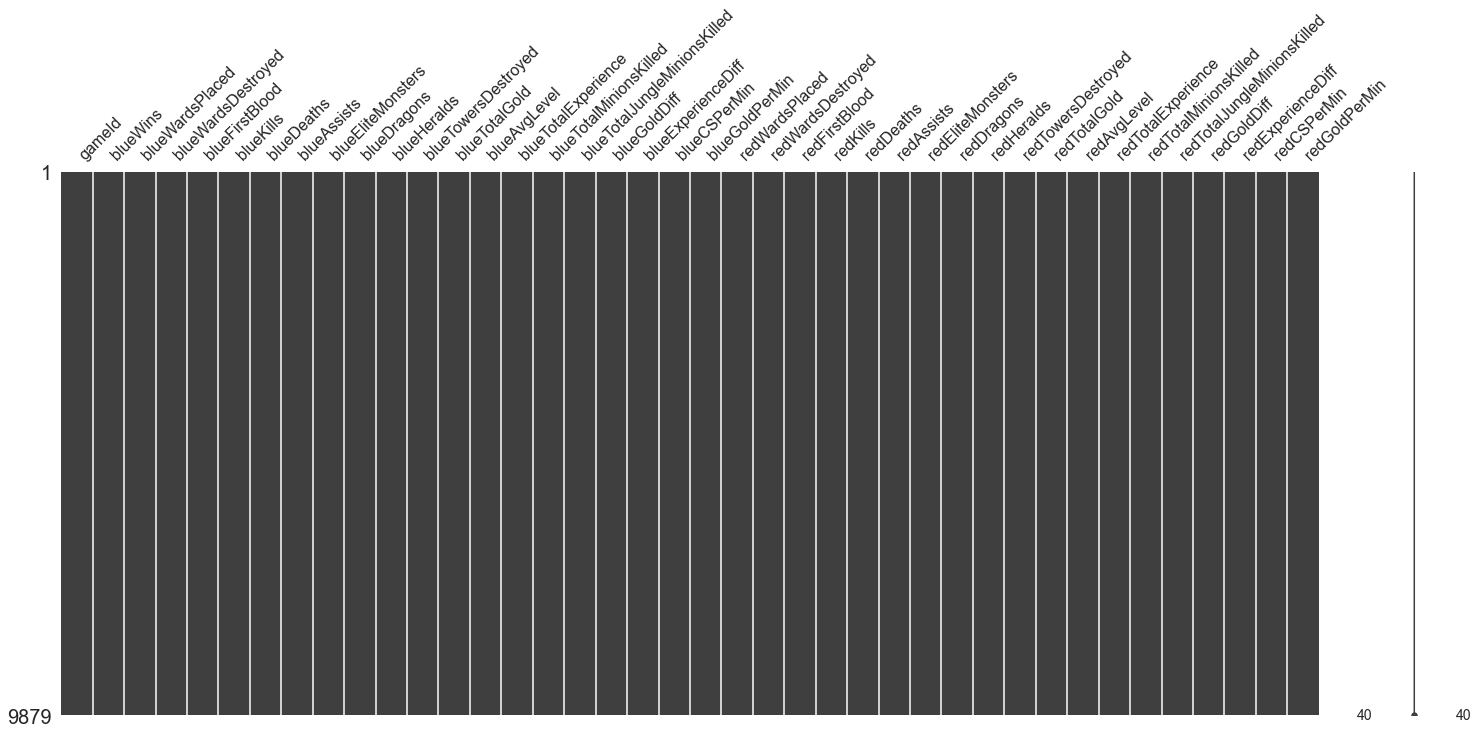

In [28]:
import missingno as mn

mn.matrix(df)

# Count unique values in column 'gameId' of the dataframe
print('Number of unique values in column "gameId" : ', df['gameId'].nunique())

dup_df = df.duplicated()
print('Duplicates : ', len(df[dup_df]))

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.3 Cleaning the Dataset

After confirming there are no duplicates in the data, the "gameId" column can be removed since it
will have no impact on the results.

Using the correlation feature from the `pandas` package, for each team we find the names of
attributes that correlate most with winning (correlation >= 7%). The names of these attributes
are stored in a array for later use.

Lastly, two dataframes are created to hold the attributes at instances when blue team wins, and
when blue team loses.

In [29]:
del df['gameId']

red_col = df.corr()[df.corr()['blueWins'] <= -0.07].index.values
blue_col = df.corr()[df.corr()['blueWins'] >= 0.07].index.values

# Create dataframes for the 2 possible outcomes :
df_win  = df[df["blueWins"]==1]     # Blue Team Win  /  Red Team Lost
df_lose = df[df["blueWins"]==0]     # Red Team Win   /  Blue Team Lost

----------------------

## 3. Data Visualization

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1 Data Exploration

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.1 Win rate by Team
Does being on a specific team have an impact on winning?

For context :
- Red team defends the top right Nexus
- Blue team defends the bottom left Nexus

Text(0, 0.5, 'Frequency')

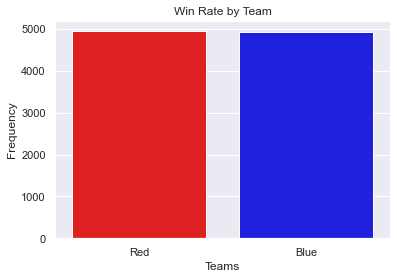

In [30]:
ax = sns.countplot(x="blueWins", data=df, palette=['red', 'blue'])
ax.set_title('Win Rate by Team')
ax.set_xlabel('Teams')
ax.set_xticks([0,1])
ax.set_xticklabels(['Red', 'Blue'])
ax.set_ylabel('Frequency')

Because each team puts you on a specific side of the map, some may think that having a specific perspective on the map
may make an impact on your chances of winning. As shown above, the win rate for each team is symmetrical within the
large dataset, meaning that defending a specific side of the map will likely not have an impact on the game outcome.


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.2 Win rate by kill/death/assist ratio

A KDA, or Kills/Deaths/Assists, ratio is highly significant when determining whether a team will win or not.
A KDA ratio is calculated by using the formula shown in the code below(Kills + Assists / Deaths).

Text(0.5, 1.0, 'Win % by KDA ratio')

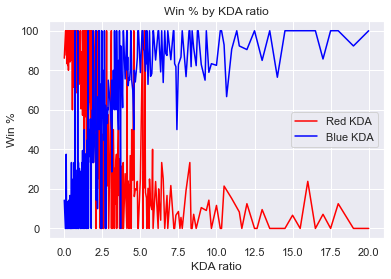

In [31]:
# Formula to calculate KDA ratio ------> KDA = (Kills + Assists) / Deaths
df['redKDA'] = ((df['redKills'] + df['redAssists']) / df['redDeaths'])
df['blueKDA'] = ((df['blueKills'] + df['blueAssists']) / df['blueDeaths'])

# Group all KDA's for each team
df_redKDA = df[(df['redKDA'] <= 20)].groupby(by=['redKDA'])
df_blueKDA = df[(df['blueKDA'] <= 20)].groupby(by=['blueKDA'])

# Calculate probability of winning according to KDA
# Frequency of winning according to KDA / Frequency for each KDA * 100
redKDA_rate = (df_redKDA.blueWins.sum() / df_redKDA.blueWins.count() * 100)
blueKDA_rate = (df_blueKDA.blueWins.sum() / df_blueKDA.blueWins.count() * 100)

ax = sns.lineplot(data=redKDA_rate, label='Red KDA', color='red')
sns.lineplot(data=blueKDA_rate, label='Blue KDA', color='blue')
ax.set_xlabel('KDA ratio')
ax.set_ylabel('Win %')
ax.set_title('Win % by KDA ratio')


The line plot shown above helps us visualize the KDA's at instances where the blue team won. The x-axis
represents the KDA obtained by a team. Meanwhile the y-axis represents the probability of winning according to a
teams KDA ratio. When the dataframes are initially grouped according to blue/red team kda, only KDA's under 20
are taken into consideration since they are the most relevant/frequent data. The line plot does an excellent job
at displaying the frequency of each KDA, i.e the interval 0.0 - 5.0 shows us the most common KDA ratios obtained
within diamond ranked games. Additionally it helps teams/players see how when the blue team KDA ratio rises, the
probability of red team winning rapidly declines.

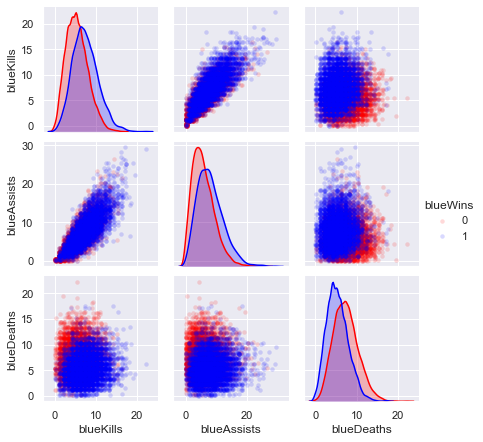

In [32]:
jitter_values = ['blueKills','blueAssists','blueDeaths','blueWins']

df_jitter = df[jitter_values].copy()
df_jitter[['blueKills','blueAssists','blueDeaths']] += np.random.rand(len(df_jitter),3)/2
ax = sns.pairplot(df_jitter,hue="blueWins",height=2,plot_kws=dict(s=20,alpha=0.15,linewidth=0),palette=['red','blue'])

plt.show()

We additionally use a jitter plot to demonstrate KDA ratio, but we break down the ratio into
the original attributes (blueKills, blueAssists, & blueDeaths). The bottom row of the jitter
plot emphasizes the already known correlation deaths has with losing games. Players/teams should
be expected to already know this since everytime a player on your team dies, the opposing team
receives gold.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.3 Win rate by objective eliminations

blueWins                                   False  True 
blueEliteMonsters blueDragons blueHeralds              
0                 0           0             3101   2055
1                 0           1              564    583
                  1           0             1096   1770
2                 1           1              188    522

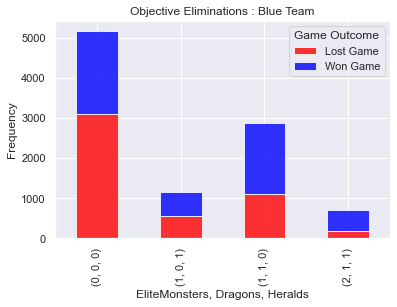

In [33]:
obj_blue = pd.crosstab([df['blueEliteMonsters'],df['blueDragons'],df['blueHeralds']],df.blueWins.astype(bool))

ax_blue = obj_blue.plot(kind='bar', stacked=True, label='Game Outcome', color=['red', 'blue'], alpha=0.8)
ax_blue.set_xlabel('EliteMonsters, Dragons, Heralds')
ax_blue.set_ylabel('Frequency')
ax_blue.set_title('Objective Eliminations : Blue Team')
ax_blue.legend(["Lost Game", "Won Game"], title="Game Outcome")

obj_blue

The stacked plot shown above contains values regarding objective eliminations for elite monsters. As mentioned
in section `2.1`, these elite monsters are dragons, & heralds.

By eliminating these elite monsters, a team/player will gain perks that give you advantages such as increased damaged
dealing, or regenerating health quicker. The stacked plots shown above, show the clear impact these elite monsters have
on winning.

Breaking down the 'obj_blue' table into percentages:
- 0 elite monsters : ~40% win rate
- 1 herald (0 dragons) : ~50% win rate
- 1 dragon (0 heralds) : ~60% win rate
- herald & dragon : ~70% win rate

Players/Teams but mostly 'Jungle' role players should take note of these percentages. A couple things to point out:
- If no elite monsters are obtained within the first 10 minutes of playing, ~60% of the time they are shown to lose.
- A 'jungler' should prioritize on eliminating a dragon before a herald, as a dragon seems to yield a %60 win rate.
- Out of ~5,000 diamond ranked matches where blue team won, only in ~700 games was blue team able to eliminate both a
dragon and herald within the first 10 minutes. Most importantly, in the games this occurred in, ~70% of them resulted
in a win. So as a team it would be strongly advised to help your 'jungle' role player eliminate these elite monsters.

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.1.4 Win rate by Kills & GoldPerMinute

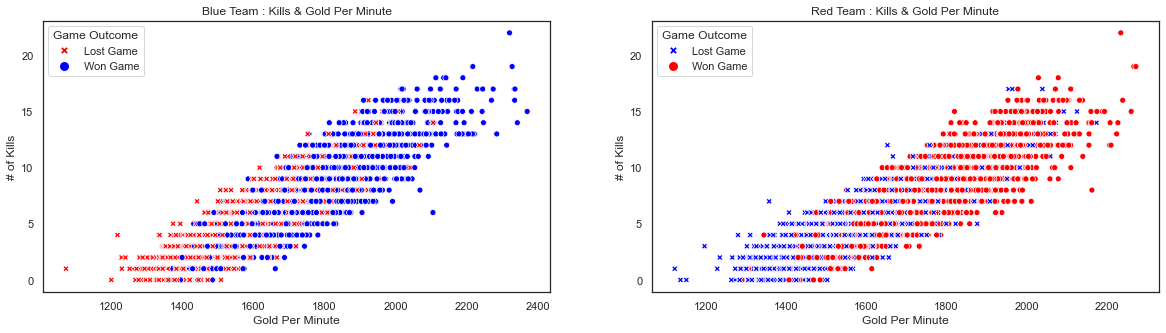

In [34]:
from matplotlib.lines import Line2D

mark1 = {0:"X", 1:"o"}
mark2 = {0:"o", 1:"X"}

legend_elements_1 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='red',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='blue',markersize=10)]
legend_elements_2 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='blue',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='red',markersize=10)]

plt.subplots(figsize=(20,5))
sns.set_style("white")

plt.subplot(1,2,1)
ax1 = sns.scatterplot(data=df,x='blueGoldPerMin',y='blueKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark1)
ax1.set_title('Blue Team : Kills & Gold Per Minute')
ax1.set_xlabel('Gold Per Minute')
ax1.set_ylabel('# of Kills')
ax1.legend(title='Game Outcome',handles=legend_elements_1,loc='upper left')

plt.subplot(1,2,2)
ax2 = sns.scatterplot(data=df,x='redGoldPerMin',y='redKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark2)
ax2.set_title('Red Team : Kills & Gold Per Minute')
ax2.set_xlabel('Gold Per Minute')
ax2.set_ylabel('# of Kills')
ax2.legend(title='Game Outcome',handles=legend_elements_2,loc='upper left')

plt.show()

Above we have scatter plots for each teams performances during games that they won/lost. The x-axis
represents the average gold per minute, & the y-axis represents the number of kills. In both scatter
plots we see the same pattern of the higher number a kills & average gold per minute achieved by a
team, will often lead to winning the game.

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2 Data Relationship Exploration

#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.1 Correlation Matrix

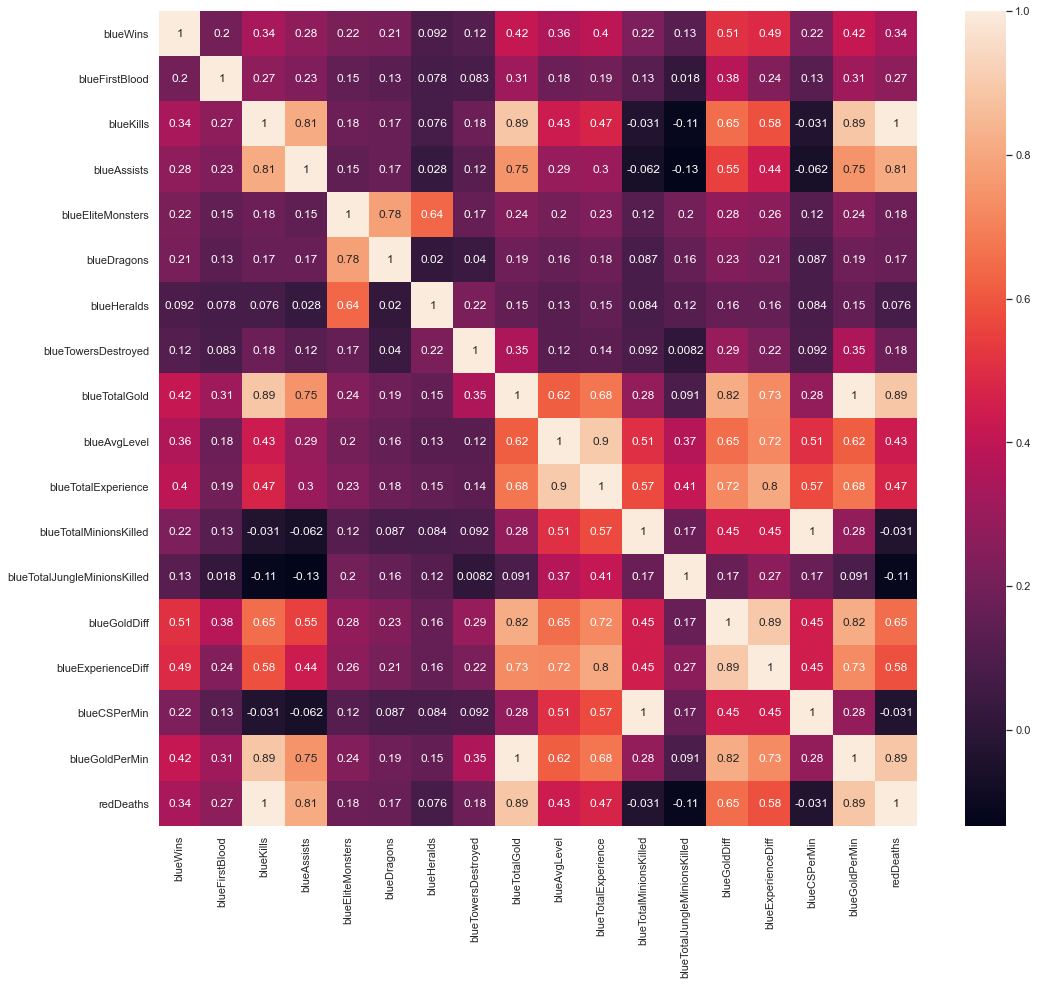

In [35]:
cmap = sns.set(style="darkgrid", palette="colorblind")

plt.subplots(figsize=(17,15))
plt.pcolor(df[blue_col].corr())
plt.xticks(np.arange(0, len(blue_col), 1), blue_col)
plt.yticks(np.arange(0, len(blue_col), 1), blue_col)
plt.xticks(rotation=90)
sns.heatmap(df[blue_col].corr(),cmap=cmap,annot=True)
plt.show()

The heatmap printed above contains correlating values pertaining to the 'blueWins' attribute.
We observe that there are 6 attributes with a correlation value of 1 ('blueWins' not included) :
- 'redDeaths'
- 'blueKills'
- 'blueCSPerMin'
- 'blueTotalGold'
- 'blueGoldPerMin'
- 'blueTotalMinionsKilled'


#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.2.2 Winning attributes

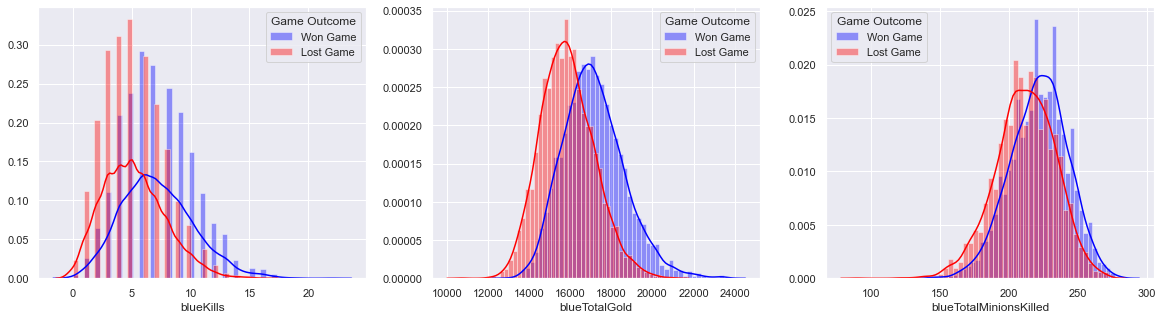

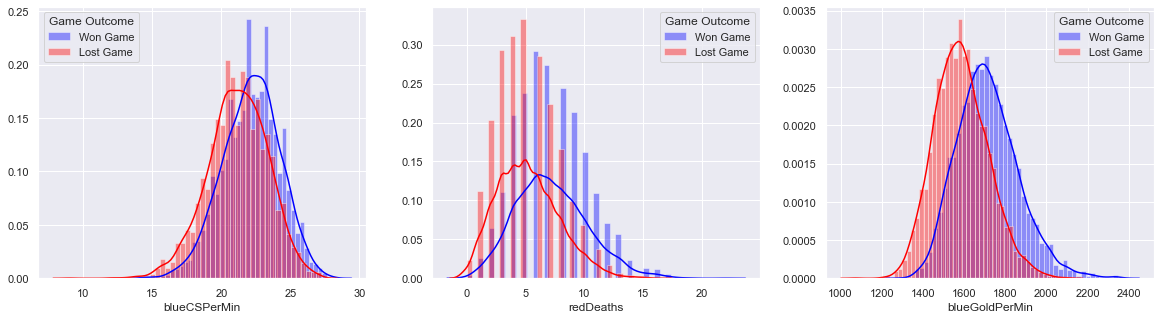

In [36]:
corr_blue = ['blueKills', 'blueTotalGold', 'blueTotalMinionsKilled', 'blueCSPerMin', 'redDeaths', 'blueGoldPerMin']

c = 0
plt.subplots(figsize=(20,5))
for i in corr_blue:
    plt.subplot(1,3,c+1)
    sns.distplot(df_win[i],label='Won Game',color='blue')
    sns.distplot(df_lose[i],label='Lost Game',color='red')
    plt.legend(title='Game Outcome')
    c=c+1

    if c == 3:
        plt.show()
        if i != corr_blue[len(corr_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0

Using the attributes we found in `3.2.1` with a correlation value of 1, we output the distribution plot
(kernel density estimation + histogram) for each attribute to help us visualize how significantly
important each of these are to winning.

The distribution plots shown above help teams/players visualize the importance of these attributes and
how the higher these attribute values are, the greater chance a team has at winning the game. Players/teams
can adjust their strategy by using the averaged values displayed in the plots above as a measure of success within
their first 10 minutes of a game.

----------------

#### References

Kaggle. League of Legends Diamond Ranked Games (First 10 Minutes).
https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min (Accessed 9-10-2020)